In [1]:
import math
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from random import randrange

C:\Users\Umarov.Sh\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


path = r"C:\Users\Umarov.Sh\Desktop\2021"
all_files = glob.glob(path+"/**/*.csv",recursive=True)
df_from_each_file = (pd.read_csv(f, sep=',', encoding='latin-1', skiprows=3, header=None, on_bad_lines='skip') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "merged_2021.csv")

In [3]:
df=pd.read_csv("merged_2021.csv", sep=',')
df.drop_duplicates(subset=['0', '1'], keep='first', inplace=True)
df = df.dropna()
pd.set_option("display.max.columns", None)

df=df[['0','1','3','15','33']]

df = df.rename(columns={'0': 'Date', '1': 'Time', '3': 'Temperature', '15': 'Wind Speed', '33': 'Wind Direction'})
df["DATE_TIME"] = pd.to_datetime(df["Date"] + " " + df["Time"], format='mixed', dayfirst=True)

df[['year_month_hday','Hour_minute']] = df['DATE_TIME'].astype(str).str.split(' ', expand=True).astype(str)
df[['Hour','Minute','Second']] = df['Hour_minute'].astype(str).str.split(':', expand=True).astype(str)
df[['Year','Month','Day']] = df['year_month_hday'].astype(str).str.split('-', expand=True).astype(str)
df


C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2391241309.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("merged_2021.csv", sep=',')


,Date,Time,Temperature,Wind Speed,Wind Direction,DATE_TIME,year_month_hday,Hour_minute,Hour,Minute,Second,Year,Month,Day
0,01.01.2021,00:00:09,-1.7,2.9,153.0,2021-01-01 00:00:09,2021-01-01,00:00:09,00,00,09,2021,01,01
1,01.01.2021,00:00:19,-1.7,2.8,162.0,2021-01-01 00:00:19,2021-01-01,00:00:19,00,00,19,2021,01,01
2,01.01.2021,00:00:29,-1.7,2.8,153.0,2021-01-01 00:00:29,2021-01-01,00:00:29,00,00,29,2021,01,01
3,01.01.2021,00:00:39,-1.7,2.8,158.0,2021-01-01 00:00:39,2021-01-01,00:00:39,00,00,39,2021,01,01
4,01.01.2021,00:00:49,-1.7,2.7,147.0,2021-01-01 00:00:49,2021-01-01,00:00:49,00,00,49,2021,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873888,14.12.2021,10:01:20,2.6,1.3,237.0,2021-12-14 10:01:20,2021-12-14,10:01:20,10,01,20,2021,12,14
2873889,14.12.2021,10:01:31,2.6,1.3,240.0,2021-12-14 10:01:31,2021-12-14,10:01:31,10,01,31,2021,12,14
2873890,14.12.2021,10:01:40,2.6,1.3,244.0,2021-12-14 10:01:40,2021-12-14,10:01:40,10,01,40,2021,12,14
2873891,14.12.2021,10:01:50,2.6,1.3,245.0,2021-12-14 10:01:50,2021-12-14,10:01:50,10,01,50,2021,12,14


In [4]:
df=df[['DATE_TIME','Month','Day','Hour','Minute','Temperature','Wind Speed', 'Wind Direction']]
df['Wind Speed'] = df['Wind Speed'].round()
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\1876887439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind Speed'] = df['Wind Speed'].round()
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\1876887439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])


,DATE_TIME,Month,Day,Hour,Minute,Temperature,Wind Speed,Wind Direction
0,2021-01-01 00:00:09,01,01,00,00,-1.7,3.0,153.0
1,2021-01-01 00:00:19,01,01,00,00,-1.7,3.0,162.0
2,2021-01-01 00:00:29,01,01,00,00,-1.7,3.0,153.0
3,2021-01-01 00:00:39,01,01,00,00,-1.7,3.0,158.0
4,2021-01-01 00:00:49,01,01,00,00,-1.7,3.0,147.0
...,...,...,...,...,...,...,...,...
2873888,2021-12-14 10:01:20,12,14,10,01,2.6,1.0,237.0
2873889,2021-12-14 10:01:31,12,14,10,01,2.6,1.0,240.0
2873890,2021-12-14 10:01:40,12,14,10,01,2.6,1.0,244.0
2873891,2021-12-14 10:01:50,12,14,10,01,2.6,1.0,245.0


In [5]:
import pandas as pd

# Assuming the dataframe is named 'df'
# Assuming the wind speed column is named 'Wind Speed' and the wind direction column is named 'Wind Direction'

# Define a function to calculate wind turbine power
def calculate_power(wind_speed):
    if wind_speed < 4 or wind_speed > 25:
        return 0
    elif wind_speed >= 4 and wind_speed < 12:
        return (wind_speed - 3.5) / (12 - 3.5) * 1
    else:
        return 1

# Apply the function to the 'Wind Speed' column to calculate the power
df['Wind Turbine Power'] = df['Wind Speed'].apply(calculate_power)

# Print the updated dataframe with the added 'Turbine Power' column
df

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\1306450168.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind Turbine Power'] = df['Wind Speed'].apply(calculate_power)


,DATE_TIME,Month,Day,Hour,Minute,Temperature,Wind Speed,Wind Direction,Wind Turbine Power
0,2021-01-01 00:00:09,01,01,00,00,-1.7,3.0,153.0,0.0
1,2021-01-01 00:00:19,01,01,00,00,-1.7,3.0,162.0,0.0
2,2021-01-01 00:00:29,01,01,00,00,-1.7,3.0,153.0,0.0
3,2021-01-01 00:00:39,01,01,00,00,-1.7,3.0,158.0,0.0
4,2021-01-01 00:00:49,01,01,00,00,-1.7,3.0,147.0,0.0
...,...,...,...,...,...,...,...,...,...
2873888,2021-12-14 10:01:20,12,14,10,01,2.6,1.0,237.0,0.0
2873889,2021-12-14 10:01:31,12,14,10,01,2.6,1.0,240.0,0.0
2873890,2021-12-14 10:01:40,12,14,10,01,2.6,1.0,244.0,0.0
2873891,2021-12-14 10:01:50,12,14,10,01,2.6,1.0,245.0,0.0


In [6]:
# Set latitude and longitude of the solar panels:

latitude = 41.3775
longitude = 64.5853

def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

df['Zenith_Angle'] = df['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
df['Solar Panel Power'] = df['Zenith_Angle'].apply(calculate_relative_power)    
df   

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\1035567193.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Zenith_Angle'] = df['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\1035567193.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Solar Panel Power'] = df['Zenith_Angle'].apply(calculate_relative_power)


,DATE_TIME,Month,Day,Hour,Minute,Temperature,Wind Speed,Wind Direction,Wind Turbine Power,Zenith_Angle,Solar Panel Power
0,2021-01-01 00:00:09,01,01,00,00,-1.7,3.0,153.0,0.0,160.820245,0.000000
1,2021-01-01 00:00:19,01,01,00,00,-1.7,3.0,162.0,0.0,160.830277,0.000000
2,2021-01-01 00:00:29,01,01,00,00,-1.7,3.0,153.0,0.0,160.840252,0.000000
3,2021-01-01 00:00:39,01,01,00,00,-1.7,3.0,158.0,0.0,160.850167,0.000000
4,2021-01-01 00:00:49,01,01,00,00,-1.7,3.0,147.0,0.0,160.860024,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2873888,2021-12-14 10:01:20,12,14,10,01,2.6,1.0,237.0,0.0,72.882580,0.294331
2873889,2021-12-14 10:01:31,12,14,10,01,2.6,1.0,240.0,0.0,72.863038,0.294657
2873890,2021-12-14 10:01:40,12,14,10,01,2.6,1.0,244.0,0.0,72.847064,0.294923
2873891,2021-12-14 10:01:50,12,14,10,01,2.6,1.0,245.0,0.0,72.829329,0.295219


In [7]:
Summer = df[df["DATE_TIME"].dt.month.isin([6, 7, 8])]
Summer

,DATE_TIME,Month,Day,Hour,Minute,Temperature,Wind Speed,Wind Direction,Wind Turbine Power,Zenith_Angle,Solar Panel Power
1206958,2021-06-01 00:00:06,06,01,00,00,33.4,2.0,130.0,0.000000,116.289438,0.0
1206959,2021-06-01 00:00:15,06,01,00,00,33.4,2.0,131.0,0.000000,116.292763,0.0
1206960,2021-06-01 00:00:25,06,01,00,00,33.4,2.0,132.0,0.000000,116.296437,0.0
1206961,2021-06-01 00:00:35,06,01,00,00,33.4,2.0,131.0,0.000000,116.300087,0.0
1206962,2021-06-01 00:00:45,06,01,00,00,33.4,2.0,132.0,0.000000,116.303713,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2001727,2021-08-31 23:59:13,08,31,23,59,23.8,4.0,263.0,0.058824,130.123668,0.0
2001728,2021-08-31 23:59:23,08,31,23,59,23.8,4.0,257.0,0.058824,130.128455,0.0
2001729,2021-08-31 23:59:34,08,31,23,59,23.9,4.0,255.0,0.058824,130.133688,0.0
2001730,2021-08-31 23:59:43,08,31,23,59,23.9,4.0,255.0,0.058824,130.137944,0.0


In [8]:
Winter = df[df["DATE_TIME"].dt.month.isin([1, 2, 12])]
Winter

,DATE_TIME,Month,Day,Hour,Minute,Temperature,Wind Speed,Wind Direction,Wind Turbine Power,Zenith_Angle,Solar Panel Power
0,2021-01-01 00:00:09,01,01,00,00,-1.7,3.0,153.0,0.0,160.820245,0.000000
1,2021-01-01 00:00:19,01,01,00,00,-1.7,3.0,162.0,0.0,160.830277,0.000000
2,2021-01-01 00:00:29,01,01,00,00,-1.7,3.0,153.0,0.0,160.840252,0.000000
3,2021-01-01 00:00:39,01,01,00,00,-1.7,3.0,158.0,0.0,160.850167,0.000000
4,2021-01-01 00:00:49,01,01,00,00,-1.7,3.0,147.0,0.0,160.860024,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2873888,2021-12-14 10:01:20,12,14,10,01,2.6,1.0,237.0,0.0,72.882580,0.294331
2873889,2021-12-14 10:01:31,12,14,10,01,2.6,1.0,240.0,0.0,72.863038,0.294657
2873890,2021-12-14 10:01:40,12,14,10,01,2.6,1.0,244.0,0.0,72.847064,0.294923
2873891,2021-12-14 10:01:50,12,14,10,01,2.6,1.0,245.0,0.0,72.829329,0.295219


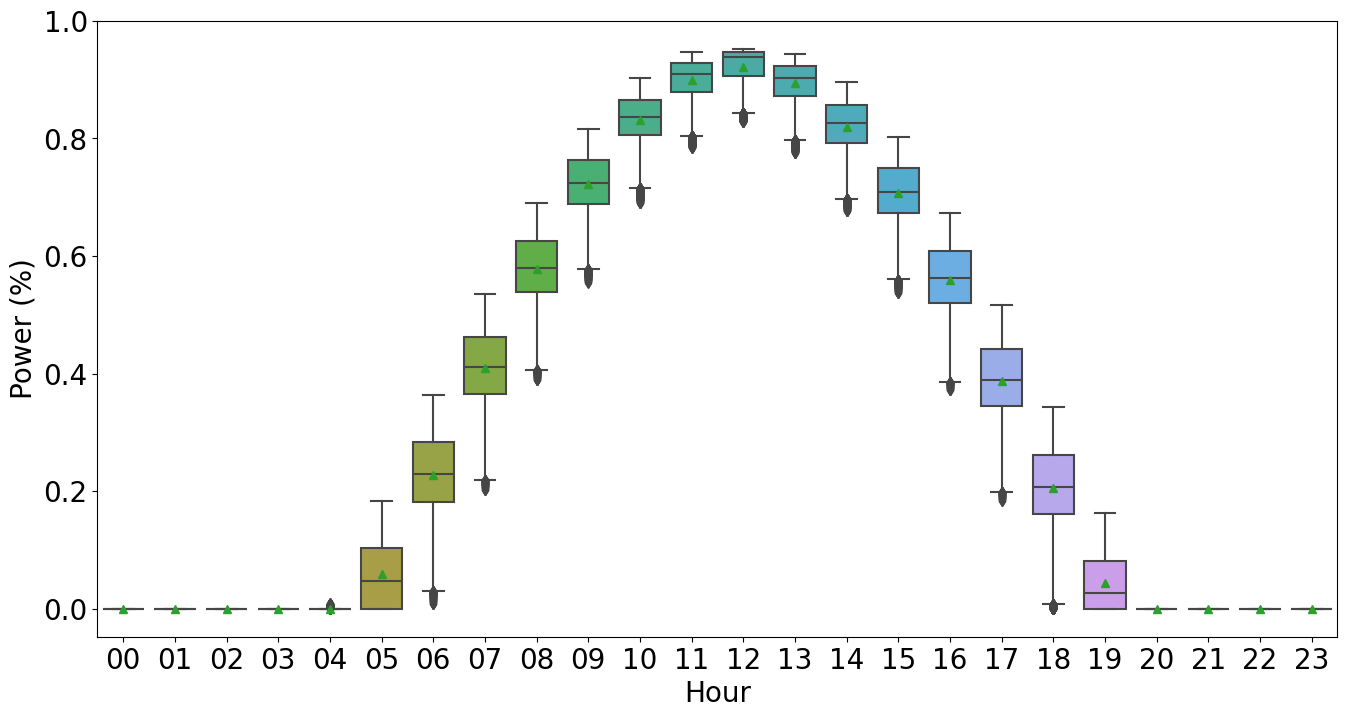

In [9]:
sns.boxplot( y=Summer['Solar Panel Power'], x=Summer['Hour'], showmeans=True );
#ax.set_xlim(10, 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
#plt.title('2019-2022гг')
ax = plt.gca()
#ax.set_ylim([1000, 1300])
#ax.set_xlim([0, 26])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2875617207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2875617207.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['DATE_TIME'].dt.month
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2875617207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

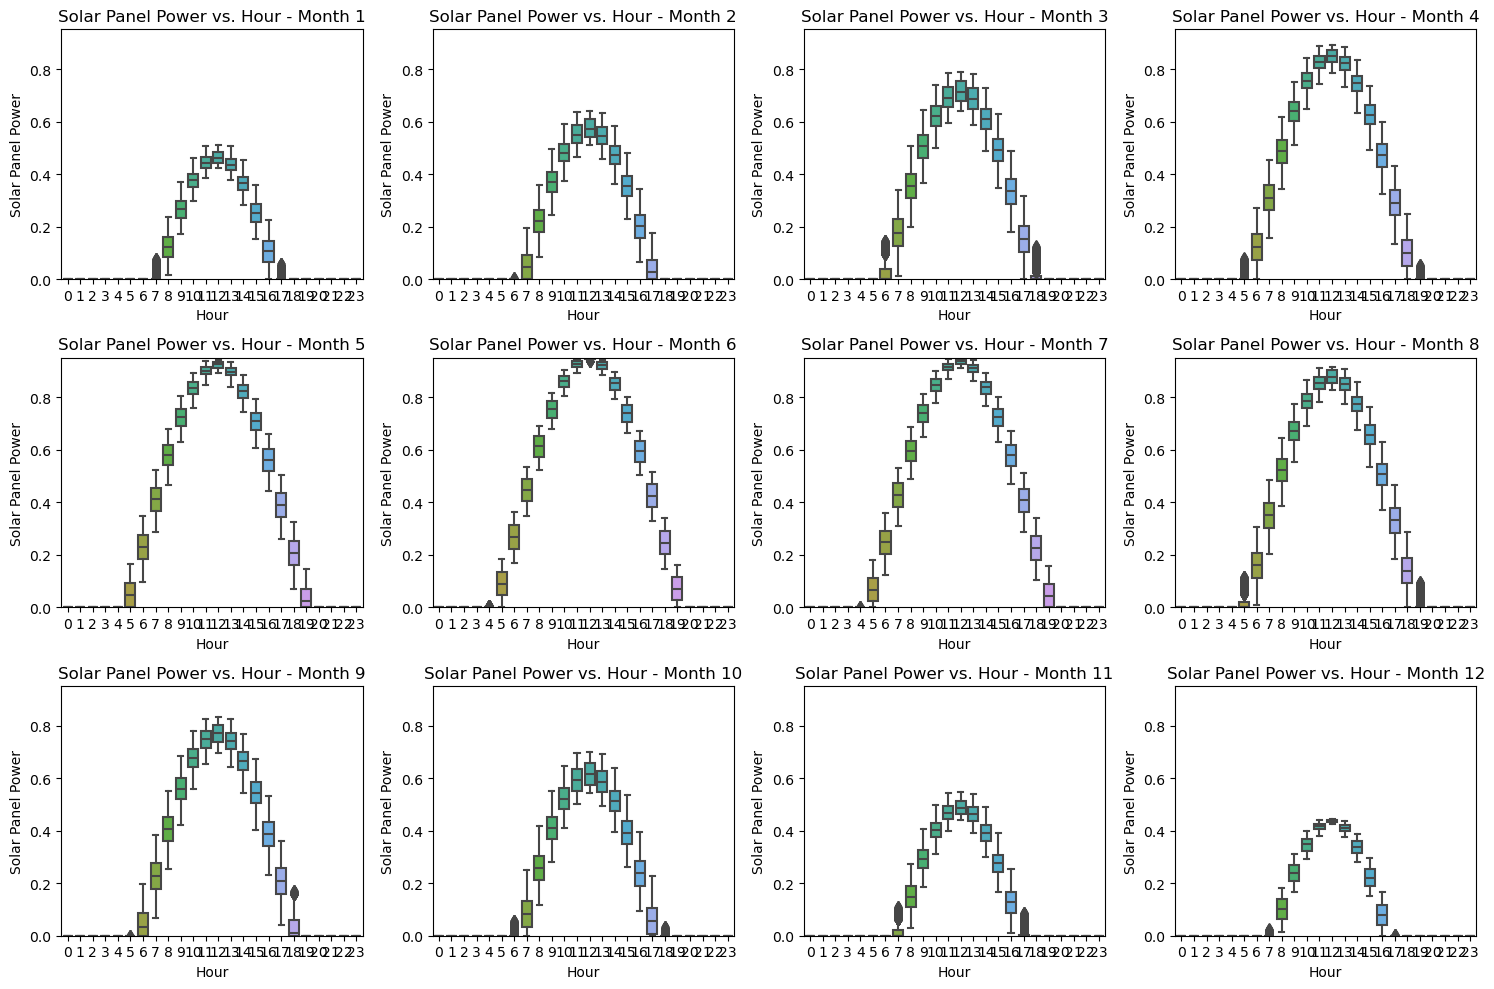

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load DataFrame (assuming it's named df)
# df = pd.read_csv('your_data_file.csv')

# Step 3: Convert "DATE_TIME" column to datetime format
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

# Step 4: Extract the month and hour from "DATE_TIME"
df['Month'] = df['DATE_TIME'].dt.month
df['Hour'] = df['DATE_TIME'].dt.hour

# Step 5-9: Loop to generate 12 plots, one for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Create subplot grid
axes = axes.flatten()  # Flatten the subplot grid to a 1D array

# Determine the overall y-axis limits
y_min = df['Solar Panel Power'].min()
y_max = df['Solar Panel Power'].max()

for month in range(1, 13):
    # Step 6: Filter DataFrame for the current month
    month_df = df[df['Month'] == month]

    # Step 7: Create boxplot
    ax = axes[month-1]  # Get the appropriate subplot
    sns.boxplot(data=month_df, x='Hour', y='Solar Panel Power', ax=ax)
    
    # Step 8: Set plot title
    ax.set_title(f'Solar Panel Power vs. Hour - Month {month}')
    
    # Step 10: Set common y-axis limits
    ax.set_ylim(y_min, y_max)
    
plt.tight_layout()  # Adjust subplot spacing
plt.show()

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\3146364366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = pd.to_datetime(df['DATE_TIME']).dt.hour
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\3146364366.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = pd.to_datetime(df['DATE_TIME']).dt.quarter % 4 + 1


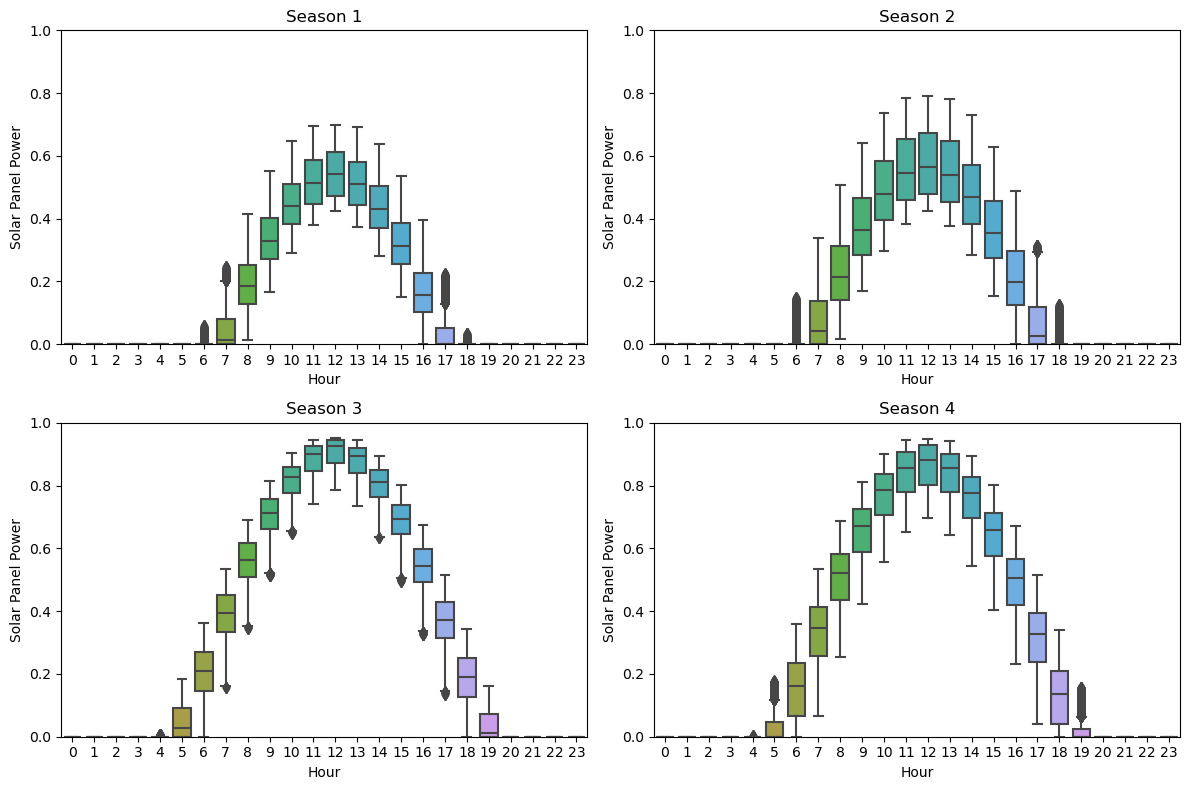

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe name is 'df'

# Extracting Hour and Season from the DATE_TIME column
df['Hour'] = pd.to_datetime(df['DATE_TIME']).dt.hour
df['Season'] = pd.to_datetime(df['DATE_TIME']).dt.quarter % 4 + 1

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Defining the seasons and their corresponding axis position
seasons = {1: (0, 0), 2: (0, 1), 3: (1, 0), 4: (1, 1)}

# Looping over each season
for season in range(1, 5):
    # Selecting data for the current season
    season_data = df[df['Season'] == season]

    # Setting up the subplot for the current season
    ax = axes[seasons[season][0], seasons[season][1]]
    
    # Creating the boxplot
    sns.boxplot(data=season_data, x='Hour', y='Solar Panel Power', ax=ax)
    
    # Setting the Y-axis limits
    ax.set_ylim(0, 1.0)
    
    # Setting the subplot title
    ax.set_title(f'Season {season}')

# Adjusting the spacing between subplots
fig.tight_layout()

# Displaying the plot
plt.show()

In [12]:
df_wind = pd.read_csv('T1.csv')
df_wind = df_wind.rename(columns={'Wind Direction (°)': 'Wind Direction', 'Wind Speed (m/s)': 'Wind Speed'})
df_wind['Wind Speed'] = df_wind['Wind Speed'].round()
df_wind[['Day','Month', 'Year', 'Hour']] = df_wind['Date/Time'].astype(str).str.split(' ', expand=True).astype(str)
df_wind[['Hour','Minute']] = df_wind['Hour'].astype(str).str.split(':', expand=True).astype(str)
df_wind["Normalized"]=df_wind['Theoretical_Power_Curve (KWh)']/df_wind['Theoretical_Power_Curve (KWh)'].max()
df_wind


,Date/Time,LV ActivePower (kW),Wind Speed,Theoretical_Power_Curve (KWh),Wind Direction,Day,Month,Year,Hour,Minute,Normalized
0,01 01 2018 00:00,380.047791,5.0,416.328908,259.994904,01,01,2018,00,00,0.115647
1,01 01 2018 00:10,453.769196,6.0,519.917511,268.641113,01,01,2018,00,10,0.144422
2,01 01 2018 00:20,306.376587,5.0,390.900016,272.564789,01,01,2018,00,20,0.108583
3,01 01 2018 00:30,419.645905,6.0,516.127569,271.258087,01,01,2018,00,30,0.143369
4,01 01 2018 00:40,380.650696,6.0,491.702972,265.674286,01,01,2018,00,40,0.136584
...,...,...,...,...,...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.0,3397.190793,80.502724,31,12,2018,23,10,0.943664
50526,31 12 2018 23:20,1684.353027,7.0,1173.055771,84.062599,31,12,2018,23,20,0.325849
50527,31 12 2018 23:30,2201.106934,8.0,1788.284755,84.742500,31,12,2018,23,30,0.496746
50528,31 12 2018 23:40,2515.694092,9.0,2418.382503,84.297913,31,12,2018,23,40,0.671773


In [13]:
import pandas as pd

# Assuming the dataframe is named 'df'
# Assuming the wind speed column is named 'Wind Speed' and the wind direction column is named 'Wind Direction'

# Define a function to calculate wind turbine power
def calculate_power(wind_speed):
    if wind_speed < 4 or wind_speed > 25:
        return 0
    elif wind_speed >= 4 and wind_speed < 12:
        return (wind_speed - 3.5) / (12 - 3.5) * 1
    else:
        return 1

# Apply the function to the 'Wind Speed' column to calculate the power
df_wind['Wind Turbine Power'] = df_wind['Wind Speed'].apply(calculate_power)

# Print the updated dataframe with the added 'Turbine Power' column
df_wind

,Date/Time,LV ActivePower (kW),Wind Speed,Theoretical_Power_Curve (KWh),Wind Direction,Day,Month,Year,Hour,Minute,Normalized,Wind Turbine Power
0,01 01 2018 00:00,380.047791,5.0,416.328908,259.994904,01,01,2018,00,00,0.115647,0.176471
1,01 01 2018 00:10,453.769196,6.0,519.917511,268.641113,01,01,2018,00,10,0.144422,0.294118
2,01 01 2018 00:20,306.376587,5.0,390.900016,272.564789,01,01,2018,00,20,0.108583,0.176471
3,01 01 2018 00:30,419.645905,6.0,516.127569,271.258087,01,01,2018,00,30,0.143369,0.294118
4,01 01 2018 00:40,380.650696,6.0,491.702972,265.674286,01,01,2018,00,40,0.136584,0.294118
...,...,...,...,...,...,...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.0,3397.190793,80.502724,31,12,2018,23,10,0.943664,0.882353
50526,31 12 2018 23:20,1684.353027,7.0,1173.055771,84.062599,31,12,2018,23,20,0.325849,0.411765
50527,31 12 2018 23:30,2201.106934,8.0,1788.284755,84.742500,31,12,2018,23,30,0.496746,0.529412
50528,31 12 2018 23:40,2515.694092,9.0,2418.382503,84.297913,31,12,2018,23,40,0.671773,0.647059


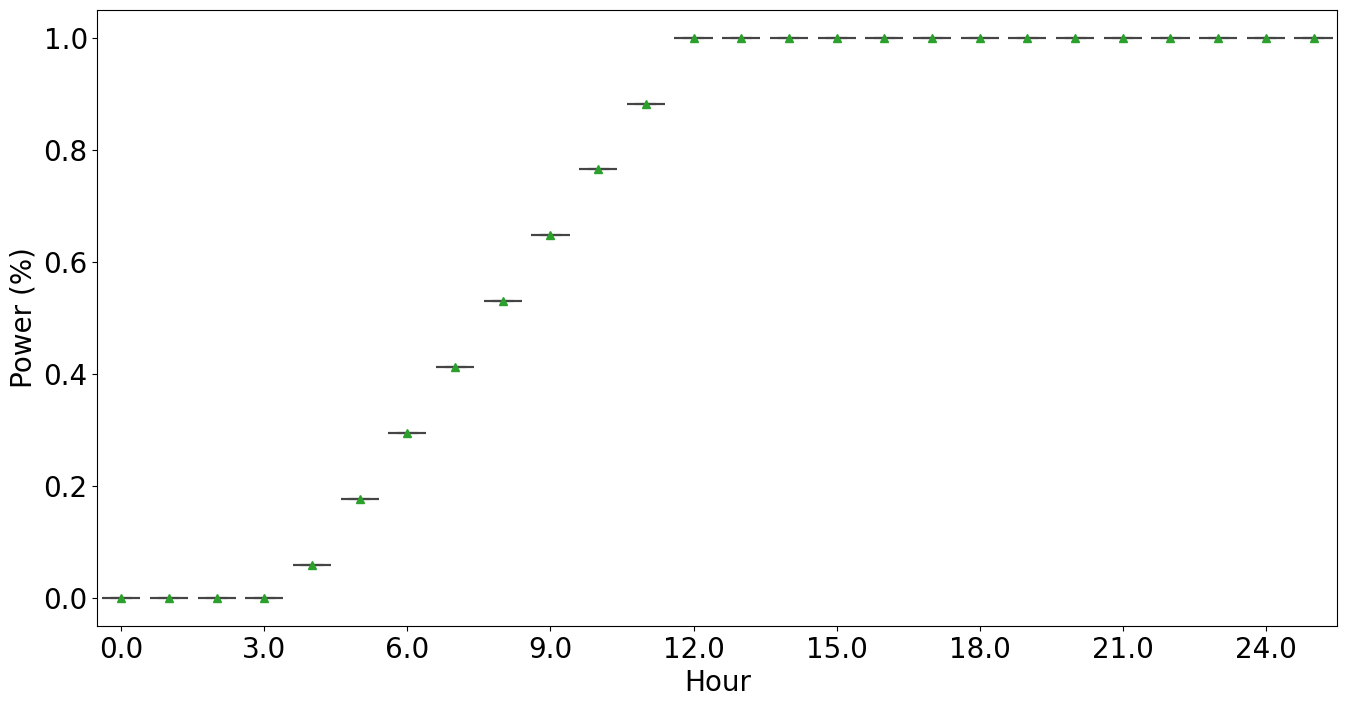

In [14]:
sns.boxplot( y=df_wind["Wind Turbine Power"], x=df_wind["Wind Speed"], showmeans=True );
#ax.set_xlim(10, 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
#plt.title('2019-2022гг')
ax = plt.gca()
#ax.set_ylim([1000, 1300])
#ax.set_xlim([0, 26])
#plt.yticks(np.arange(800, 1300, 30))
#plt.xticks(np.arange(0, 30, 1))
plt.gca().locator_params(nbins=10)
plt.show()

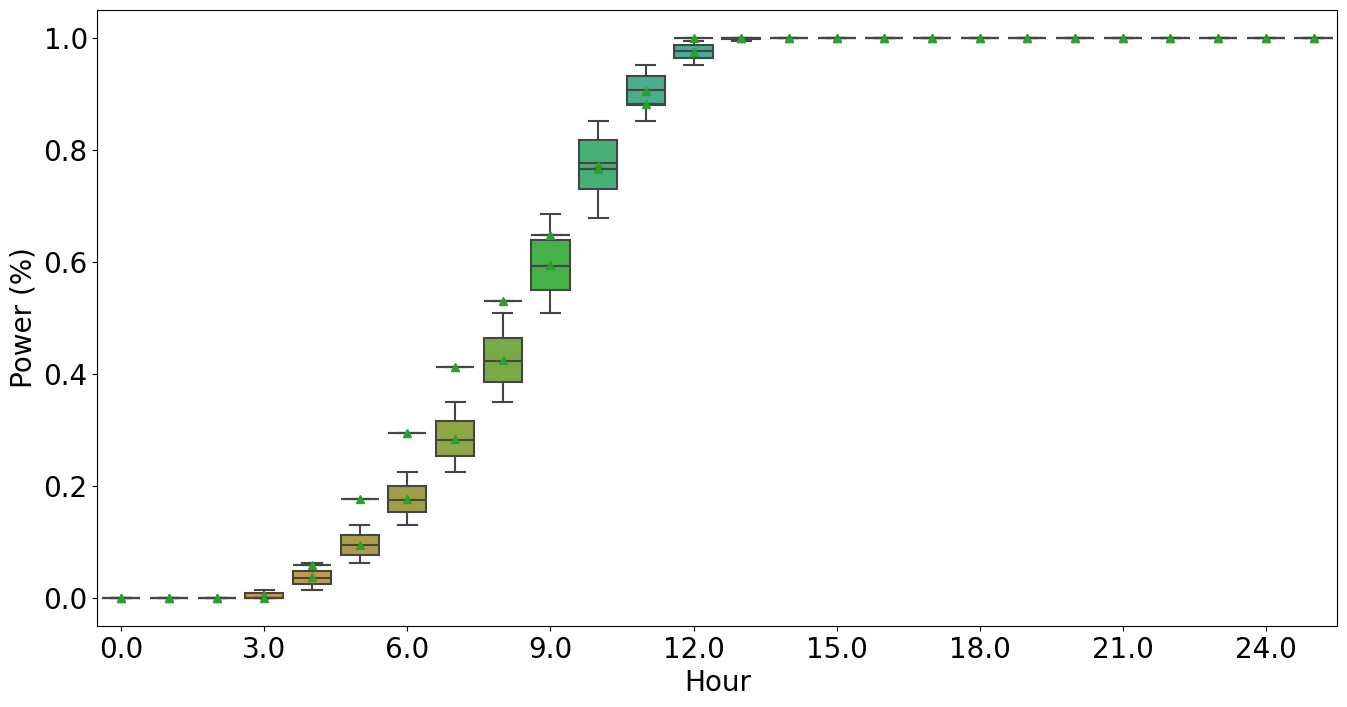

In [15]:
sns.boxplot( y=df_wind["Normalized"], x=df_wind["Wind Speed"], showmeans=True );
sns.boxplot( y=df_wind["Wind Turbine Power"], x=df_wind["Wind Speed"], showmeans=True );
#ax.set_xlim(10, 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
#plt.title('2019-2022гг')
ax = plt.gca()
#ax.set_ylim([1000, 1300])
#ax.set_xlim([0, 26])
#plt.yticks(np.arange(800, 1300, 30))
#plt.xticks(np.arange(0, 30, 1))
plt.gca().locator_params(nbins=10)
plt.show()

In [16]:
colnames=['Date/Time','Temperature','B','D','E','F', 'Wind Direction','Wind Speed', 'I','J', 'K','L', 'M','N', 'O','P','Q','R','S','T','U','V', 'W',  \
           'X', 'Y','Z', 'AA','AB', 'AC']
dff = pd.read_excel('Tashkent2023.xls', skiprows=[0,1,2,3,4,5], names=colnames)
dff

,Date/Time,Temperature,B,D,E,F,Wind Direction,Wind Speed,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC
0,31.12.2023 23:00,2.8,724.0,768.7,-0.7,64.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,12.5,NaN,NaN,NaN,NaN,NaN,10,-3.4,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2023 20:00,3.9,724.7,769.3,0.0,72.0,"Ветер, дующий с севера",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,12.5,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10,-0.7,NaN,NaN,NaN,NaN,NaN,NaN
2,31.12.2023 17:00,8.2,724.7,768.6,-0.5,56.0,"Ветер, дующий с юго-запада",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,-0.2,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2023 14:00,10.7,725.2,768.9,-1.2,36.0,"Ветер, дующий с юго-запада",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",50,-3.8,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2023 11:00,6.8,726.4,770.7,0.3,46.0,"Штиль, безветрие",0.0,NaN,NaN,40%.,,NaN,NaN,-1.2,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",50,-4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,01.01.2023 14:00,5.1,730.6,775.5,-1.7,66.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10,-0.8,NaN,NaN,NaN,NaN,NaN,NaN
2908,01.01.2023 11:00,-1.5,732.3,778.3,0.4,96.0,"Штиль, безветрие",0.0,NaN,NaN,40%.,"Туман или ледяной туман, небо видно, ослабел з...",Туман или ледяной туман или сильная мгла.,Облака покрывали половину неба или менее в теч...,-3.7,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",4,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2909,01.01.2023 08:00,-3.3,731.9,778.3,-0.2,92.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,-4.4,NaN,NaN,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,2.0
2910,01.01.2023 05:00,-2.8,732.1,778.4,-0.1,86.0,"Ветер, дующий с северо-северо-запада",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.",Клочья (часто чечевицеобразные) высококучевых ...,"Перистые нитевидные, иногда когтевидные, не ра...",10,-4.8,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:

dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с юго-востока', '135', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с востока', '90', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с востоко-юго-востока', '112', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с юга', '180', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с юго-юго-востока', '157', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с севера', '0', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с северо-востока', '45', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с запада', '270', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с северо-северо-запада', '337', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с востоко-северо-востока', '67', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с северо-северо-востока', '22', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с западо-северо-запада', '292', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с западо-юго-запада', '247', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с северо-запада', '315', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с юго-запада', '225', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с юго-юго-запада', '202', inplace=True)




dff.loc[dff['Wind Direction'] == 'Переменное направление', 'Wind Speed (m/s)'] = 0
dff.loc[dff['Wind Direction'] == 'Штиль, безветрие', 'Wind Speed (m/s)'] = 0




dff['Wind Direction'].mask(dff['Wind Direction'] == 'Штиль, безветрие', '0', inplace=True)
dff['Wind Direction'].mask(dff['Wind Direction'] == 'Переменное направление', '0', inplace=True)


C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\4196683958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['Wind Direction'].mask(dff['Wind Direction'] == 'Ветер, дующий с юго-востока', '135', inplace=True)
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\4196683958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [18]:
dff = dff[['Date/Time', 'Temperature', 'Wind Speed', 'Wind Direction']]
dff

,Date/Time,Temperature,Wind Speed,Wind Direction
0,31.12.2023 23:00,2.8,1.0,67
1,31.12.2023 20:00,3.9,1.0,0
2,31.12.2023 17:00,8.2,1.0,225
3,31.12.2023 14:00,10.7,1.0,225
4,31.12.2023 11:00,6.8,0.0,0
...,...,...,...,...
2907,01.01.2023 14:00,5.1,1.0,247
2908,01.01.2023 11:00,-1.5,0.0,0
2909,01.01.2023 08:00,-3.3,1.0,45
2910,01.01.2023 05:00,-2.8,1.0,337


In [19]:
dff['Date/Time'] = pd.to_datetime(dff['Date/Time'])
dff['Month'] = dff['Date/Time'].dt.month
dff['Day'] = dff['Date/Time'].dt.day
dff['Hour'] = dff['Date/Time'].dt.hour
dff['Date/Time'] = dff['Date/Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

dff

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\417240939.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dff['Date/Time'] = pd.to_datetime(dff['Date/Time'])
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\417240939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Date/Time'] = pd.to_datetime(dff['Date/Time'])
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\417240939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Date/Time,Temperature,Wind Speed,Wind Direction,Month,Day,Hour
0,2023-12-31 23:00:00,2.8,1.0,67,12,31,23
1,2023-12-31 20:00:00,3.9,1.0,0,12,31,20
2,2023-12-31 17:00:00,8.2,1.0,225,12,31,17
3,2023-12-31 14:00:00,10.7,1.0,225,12,31,14
4,2023-12-31 11:00:00,6.8,0.0,0,12,31,11
...,...,...,...,...,...,...,...
2907,2023-01-01 14:00:00,5.1,1.0,247,1,1,14
2908,2023-01-01 11:00:00,-1.5,0.0,0,1,1,11
2909,2023-01-01 08:00:00,-3.3,1.0,45,1,1,8
2910,2023-01-01 05:00:00,-2.8,1.0,337,1,1,5


In [20]:
latitude = 41
longitude = 69

def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

# Convert 'Date/Time' to datetime format
dff['Date/Time'] = pd.to_datetime(dff['Date/Time'])

dff['Zenith_Angle'] = dff['Date/Time'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
dff['Solar Panel Power'] = dff['Zenith_Angle'].apply(calculate_relative_power)    
dff   

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2175298650.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Date/Time'] = pd.to_datetime(dff['Date/Time'])
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2175298650.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Zenith_Angle'] = dff['Date/Time'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2175298650.py:35: SettingWithCopyWarning: 
A value is trying to be 

,Date/Time,Temperature,Wind Speed,Wind Direction,Month,Day,Hour,Zenith_Angle,Solar Panel Power
0,2023-12-31 23:00:00,2.8,1.0,67,12,31,23,154.723028,0.000000
1,2023-12-31 20:00:00,3.9,1.0,0,12,31,20,122.460139,0.000000
2,2023-12-31 17:00:00,8.2,1.0,225,12,31,17,90.313095,0.000000
3,2023-12-31 14:00:00,10.7,1.0,225,12,31,14,67.772050,0.378292
4,2023-12-31 11:00:00,6.8,0.0,0,12,31,11,67.060532,0.389758
...,...,...,...,...,...,...,...,...,...
2907,2023-01-01 14:00:00,5.1,1.0,247,1,1,14,67.701326,0.379435
2908,2023-01-01 11:00:00,-1.5,0.0,0,1,1,11,66.990128,0.390890
2909,2023-01-01 08:00:00,-3.3,1.0,45,1,1,8,88.674464,0.023133
2910,2023-01-01 05:00:00,-2.8,1.0,337,1,1,5,120.557897,0.000000


C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2899549298.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Hour'] = pd.to_datetime(dff['Date/Time']).dt.hour
C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\2899549298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Season'] = pd.to_datetime(dff['Date/Time']).dt.quarter % 4 + 1


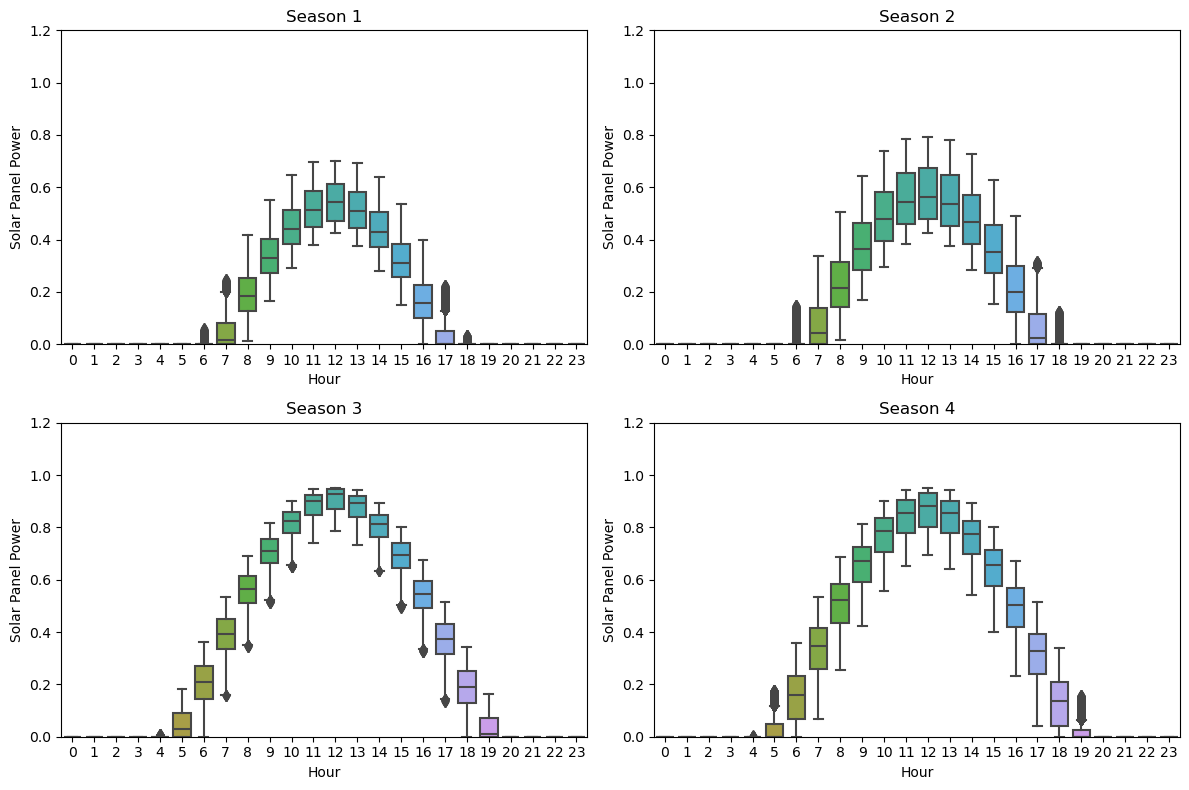

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe name is 'df'

# Extracting Hour and Season from the DATE_TIME column
dff['Hour'] = pd.to_datetime(dff['Date/Time']).dt.hour
dff['Season'] = pd.to_datetime(dff['Date/Time']).dt.quarter % 4 + 1

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Defining the seasons and their corresponding axis position
seasons = {1: (0, 0), 2: (0, 1), 3: (1, 0), 4: (1, 1)}

# Looping over each season
for season in range(1, 5):
    # Selecting data for the current season
    season_data = df[df['Season'] == season]

    # Setting up the subplot for the current season
    ax = axes[seasons[season][0], seasons[season][1]]
    
    # Creating the boxplot
    sns.boxplot(data=season_data, x='Hour', y='Solar Panel Power', ax=ax)
    
    # Setting the Y-axis limits
    ax.set_ylim(0, 1.2)
    
    # Setting the subplot title
    ax.set_title(f'Season {season}')

# Adjusting the spacing between subplots
fig.tight_layout()

# Displaying the plot
plt.show()

# VERIFICATION

In [22]:
import math
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from random import randrange

In [23]:
gen_1=pd.read_csv('Plant_2_Generation_Data.csv')
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

# Create separate columns for Hour, Month, and Day
gen_1['Hour'] = gen_1['DATE_TIME'].dt.hour
gen_1['Month'] = gen_1['DATE_TIME'].dt.month
gen_1['Day'] = gen_1['DATE_TIME'].dt.day
gen_1["Normalized_DC"]=gen_1['DC_POWER']/gen_1['DC_POWER'].max()
gen_1["Normalized_AC"]=gen_1['AC_POWER']/gen_1['AC_POWER'].max()
gen_1=gen_1[['DATE_TIME','Hour','Month','Day','Normalized_DC', 'Normalized_AC']]
gen_1

,DATE_TIME,Hour,Month,Day,Normalized_DC,Normalized_AC
0,2020-05-15 00:00:00,0,5,15,0.0,0.0
1,2020-05-15 00:00:00,0,5,15,0.0,0.0
2,2020-05-15 00:00:00,0,5,15,0.0,0.0
3,2020-05-15 00:00:00,0,5,15,0.0,0.0
4,2020-05-15 00:00:00,0,5,15,0.0,0.0
...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,23,6,17,0.0,0.0
67694,2020-06-17 23:45:00,23,6,17,0.0,0.0
67695,2020-06-17 23:45:00,23,6,17,0.0,0.0
67696,2020-06-17 23:45:00,23,6,17,0.0,0.0


In [24]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named 'gen_1' and the column is 'DATE_TIME'
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])  # Convert to datetime if not already in datetime format

# Constants for solar panel calculation
latitude = 19.6
longitude = 75.3

# Calculate solar panel relative power based on DATE_TIME
gen_1['Solar_Power'] = gen_1['DATE_TIME'].apply(lambda x: calculate_solar_power(x, latitude, longitude))

# Function to calculate solar panel relative power
def calculate_solar_power(date_time, lat, lon):
    # Extract year, month, day and hour from the date_time
    year = date_time.year
    month = date_time.month
    day = date_time.day
    hour = date_time.hour

    # Calculate the solar panel relative power based on any desired formula
    # For example, you can use any simple equations or models based on solar radiation and angles
    # Here's a simple example assuming a constant relative power of 0.8 during daytime and 0 at night
    if 6 <= hour < 18:  # Daytime from 6 AM to 6 PM
        return 0.8
    else:
        return 0.0

NameError: name 'calculate_solar_power' is not defined

In [ ]:
import pandas as pd
import numpy as np

# Assuming gen_1 is your DataFrame with DATE_TIME column
# Calculate the hour of the day from DATE_TIME
gen_1['Hour'] = gen_1['DATE_TIME'].dt.hour

# Calculate the day of the year from DATE_TIME
gen_1['Day_of_Year'] = gen_1['DATE_TIME'].dt.dayofyear

# Calculate the solar declination angle
gen_1['Solar_Declination'] = 23.45 * np.sin(360 * (284 + gen_1['Day_of_Year']) / 365 * np.pi / 180)

# Calculate the hour angle
gen_1['Hour_Angle'] = 15 * (gen_1['Hour'] - 12)

# Calculate the solar altitude angle
gen_1['Solar_Altitude'] = np.arcsin(np.sin(gen_1['Solar_Declination'] * np.pi / 180) * np.sin(19.6 * np.pi / 180) + np.cos(gen_1['Solar_Declination'] * np.pi / 180) * np.cos(19.6 * np.pi / 180) * np.cos(gen_1['Hour_Angle'] * np.pi / 180))

# Calculate the relative power based on the solar altitude angle
gen_1['Relative_Power'] = np.sin(gen_1['Solar_Altitude'])

# Define the latitude and longitude of the solar power plant
latitude = 19.6
longitude = 75.3
gen_1

In [ ]:
latitude = 19.6
longitude = 75.3

def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

# Convert 'Date/Time' to datetime format
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

gen_1['Zenith_Angle'] = gen_1['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
gen_1['Solar Panel Power'] = gen_1['Zenith_Angle'].apply(calculate_relative_power)    
gen_1['Solar Panel Power_07'] = gen_1['Zenith_Angle'].apply(calculate_relative_power)*0.95
gen_1  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'DATE_TIME' column to datetime format
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

# Filter the data for one day, e.g. 2020-05-15
one_day_data = gen_1[gen_1['DATE_TIME'].dt.date == pd.to_datetime('2020-05-22').date()]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(one_day_data['DATE_TIME'], one_day_data['Normalized_DC'], label='Normalized_AC')
plt.plot(one_day_data['DATE_TIME'], one_day_data['Solar_Power_Relative']/1000, label='Solar Panel Power')

# Set legends for the graph
plt.legend()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'DATE_TIME' column to datetime format
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

# Filter the data for one day, e.g. 2020-05-15
one_day_data = gen_1[gen_1['DATE_TIME'].dt.date == pd.to_datetime('2020-05-22').date()]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(one_day_data['DATE_TIME'], one_day_data['Normalized_DC'], label='Normalized_AC')
plt.plot(one_day_data['DATE_TIME'], one_day_data['Solar Panel Power_07'], label='Solar Panel Power')

# Set legends for the graph
plt.legend()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=gen_1['Normalized_DC'], x=gen_1['Hour'], showmeans=True)
sns.boxplot(y=gen_1['Solar Panel Power'], x=gen_1['Hour'], showmeans=True, color='red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
#plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=gen_1['Normalized_DC'], x=gen_1['Hour'], showmeans=True)
sns.boxplot(y=gen_1['Solar Panel Power'], x=gen_1['Hour'], showmeans=True, color='red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
#plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=gen_1['Normalized_AC'], x=gen_1['Hour'], showmeans=True)
sns.boxplot(y=gen_1['Solar Panel Power'], x=gen_1['Hour'], showmeans=True, color='red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
#plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'DATE_TIME' column to datetime format
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

# Filter the data for one day, e.g. 2020-05-15
one_day_data = gen_1[gen_1['DATE_TIME'].dt.date == pd.to_datetime('2020-05-22').date()]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(one_day_data['DATE_TIME'], one_day_data['Normalized_DC'], label='Normalized_AC')
plt.plot(one_day_data['DATE_TIME'], one_day_data['Solar Panel Power_07'], label='Solar Panel Power')

# Set legends for the graph
plt.legend()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




gen_1['Difference'] = abs(gen_1['Normalized_AC'] - gen_1['Solar Panel Power_07'])



closest_index = gen_1['Difference'].idxmin()
closest_date = gen_1.loc[closest_index, 'DATE_TIME'].date()



closest_df = gen_1[gen_1['DATE_TIME'].dt.date == closest_date]



plt.plot(closest_df['DATE_TIME'], closest_df['Normalized_AC'], label='Normalized_AC')
plt.plot(closest_df['DATE_TIME'], closest_df['Solar Panel Power_07'], label='Solar Panel Power_07')
plt.xlabel('DATE_TIME')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




gen_1['Difference'] = abs(gen_1['Normalized_AC'] - gen_1['Solar Panel Power'])



closest_index = gen_1['Difference'].idxmin()
closest_date = gen_1.loc[closest_index, 'DATE_TIME'].date()



closest_df = gen_1[gen_1['DATE_TIME'].dt.date == closest_date]



plt.plot(closest_df['DATE_TIME'], closest_df['Normalized_AC'], label='Normalized_AC')
plt.plot(closest_df['DATE_TIME'], closest_df['Solar Panel Power_07'], label='Solar Panel Power')
plt.xlabel('DATE_TIME')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for the desired date range
start_date = '2020-05-18'
end_date = '2020-05-19'
filtered_data = gen_1[(gen_1['DATE_TIME'] >= start_date) & (gen_1['DATE_TIME'] <= end_date)]

# Plotting the graph
plt.plot(filtered_data['DATE_TIME'], filtered_data['Normalized_AC'], label='Normalized AC')
plt.plot(filtered_data['DATE_TIME'], filtered_data['Solar Panel Power'], label='Solar Panel Power')

# Set plot title and labels
plt.title('DATE_TIME VS Normalized_AC and Solar Panel Power')
plt.xlabel('DATE_TIME')
plt.ylabel('Power')

# Set legends
plt.legend()

# Display the plot
plt.show()

In [ ]:
import pandas as pd

In [25]:
gen_1=pd.read_csv('Plant_1_Generation_Data.csv')
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'], format='%d-%m-%Y %H:%M')

# Create separate columns for Hour, Month, and Day
gen_1['Hour'] = gen_1['DATE_TIME'].dt.hour
gen_1['Month'] = gen_1['DATE_TIME'].dt.month
gen_1['Day'] = gen_1['DATE_TIME'].dt.day
gen_1["Normalized_DC"]=gen_1['DC_POWER']/gen_1['DC_POWER'].max()
gen_1["Normalized_AC"]=gen_1['AC_POWER']/gen_1['AC_POWER'].max()
gen_1=gen_1[['DATE_TIME','Hour','Month','Day','Normalized_DC', 'Normalized_AC']]
gen_1

,DATE_TIME,Hour,Month,Day,Normalized_DC,Normalized_AC
0,2020-05-15 00:00:00,0,5,15,0.0,0.0
1,2020-05-15 00:00:00,0,5,15,0.0,0.0
2,2020-05-15 00:00:00,0,5,15,0.0,0.0
3,2020-05-15 00:00:00,0,5,15,0.0,0.0
4,2020-05-15 00:00:00,0,5,15,0.0,0.0
...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,23,6,17,0.0,0.0
68774,2020-06-17 23:45:00,23,6,17,0.0,0.0
68775,2020-06-17 23:45:00,23,6,17,0.0,0.0
68776,2020-06-17 23:45:00,23,6,17,0.0,0.0


In [26]:
latitude = 14.81
longitude = 78.28

def calculate_zenith_angle(date_time, latitude, longitude):
    julian_day = date_time.timetuple().tm_yday
    time_offset = (12 - longitude / 15) * 60  # Time Offset from Greenwhich Meridian
    declination_angle = 23.45 * math.sin(math.radians(360 * (284 + julian_day) / 365))
  
    # Calculate the equation of time
    b = math.radians((julian_day - 81) * 360 / 365)
    equation_of_time = 9.87 * math.sin(2 * b) - 7.53 * math.cos(b) - 1.5 * math.sin(b)
    
    # Calculate the time correction
    time_correction = (4 * (longitude - time_offset) + equation_of_time) / 60
    
    true_solar_time = date_time.hour * 60 + date_time.minute + date_time.second / 60 + time_correction
    hour_angle = (true_solar_time - 720) * 0.25
    
    zenith_angle = math.degrees(math.acos(math.sin(math.radians(latitude)) * math.sin(math.radians(declination_angle)) + math.cos(math.radians(latitude)) * math.cos(math.radians(declination_angle)) * math.cos(math.radians(hour_angle))))
    
    return zenith_angle

# Convert 'Date/Time' to datetime format
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

gen_1['Zenith_Angle'] = gen_1['DATE_TIME'].apply(lambda x: calculate_zenith_angle(x, latitude, longitude))


def calculate_relative_power(zenith_angle):
    if zenith_angle > 90:
        return 0
    else:
        return math.cos(math.radians(zenith_angle))
    
gen_1['Solar Panel Power'] = gen_1['Zenith_Angle'].apply(calculate_relative_power)    
gen_1['Solar Panel Power_07'] = gen_1['Zenith_Angle'].apply(calculate_relative_power)*0.7
gen_1  

,DATE_TIME,Hour,Month,Day,Normalized_DC,Normalized_AC,Zenith_Angle,Solar Panel Power,Solar Panel Power_07
0,2020-05-15 00:00:00,0,5,15,0.0,0.0,145.734948,0.0,0.0
1,2020-05-15 00:00:00,0,5,15,0.0,0.0,145.734948,0.0,0.0
2,2020-05-15 00:00:00,0,5,15,0.0,0.0,145.734948,0.0,0.0
3,2020-05-15 00:00:00,0,5,15,0.0,0.0,145.734948,0.0,0.0
4,2020-05-15 00:00:00,0,5,15,0.0,0.0,145.734948,0.0,0.0
...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,23,6,17,0.0,0.0,140.725160,0.0,0.0
68774,2020-06-17 23:45:00,23,6,17,0.0,0.0,140.725160,0.0,0.0
68775,2020-06-17 23:45:00,23,6,17,0.0,0.0,140.725160,0.0,0.0
68776,2020-06-17 23:45:00,23,6,17,0.0,0.0,140.725160,0.0,0.0


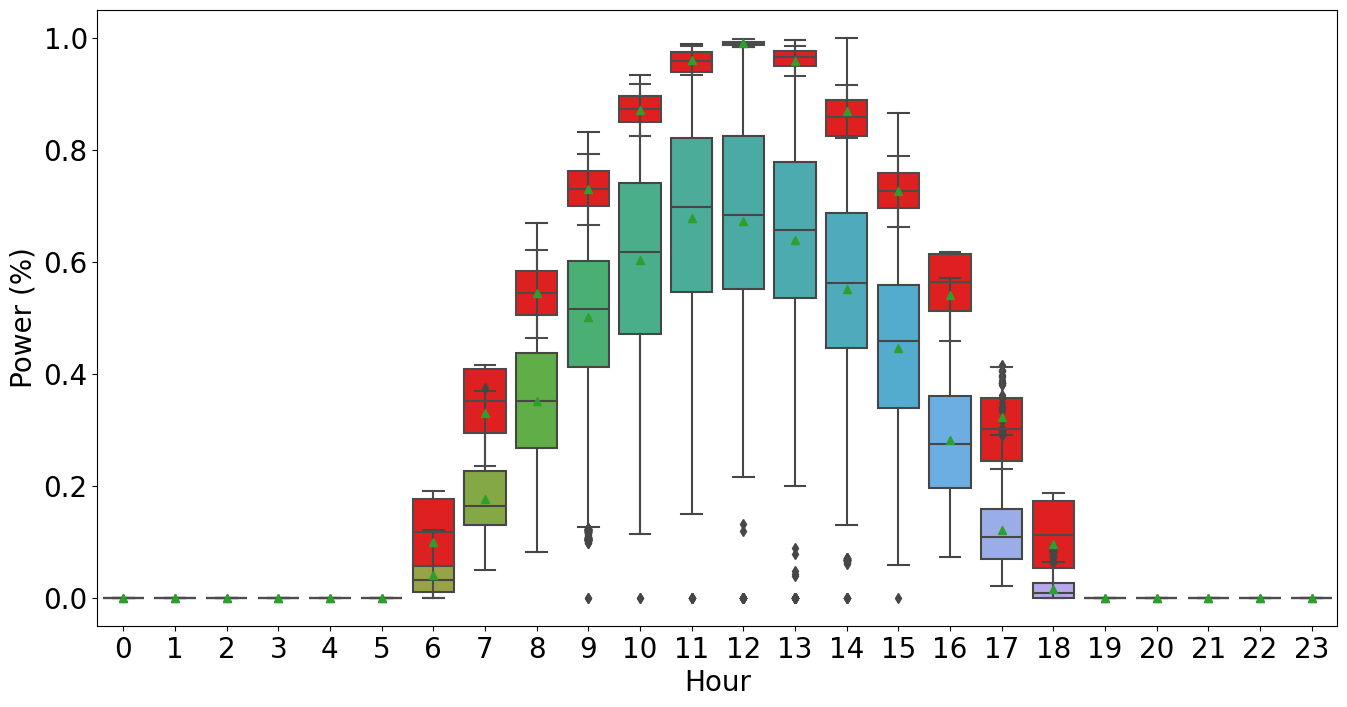

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=gen_1['Normalized_DC'], x=gen_1['Hour'], showmeans=True)
sns.boxplot(y=gen_1['Solar Panel Power'], x=gen_1['Hour'], showmeans=True, color='red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
#plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.show()

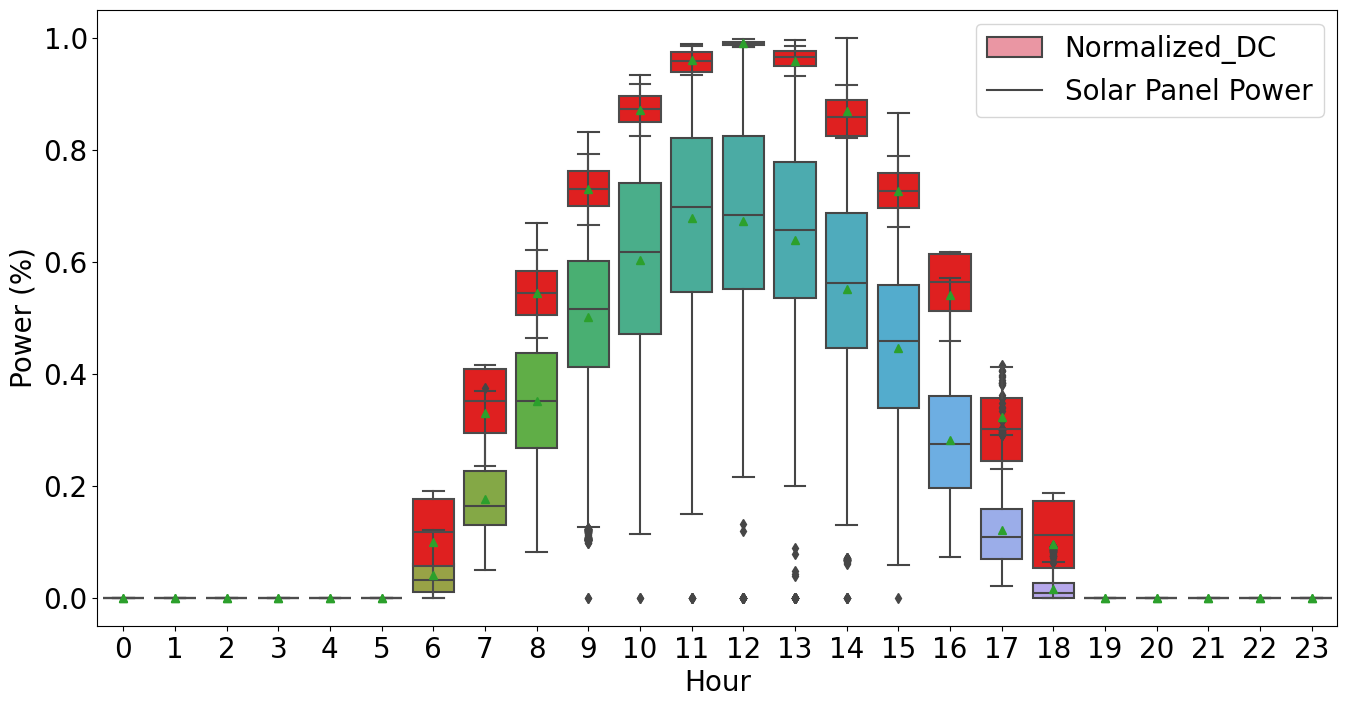

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=gen_1['Normalized_DC'], x=gen_1['Hour'], showmeans=True)
sns.boxplot(y=gen_1['Solar Panel Power'], x=gen_1['Hour'], showmeans=True, color='red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.show()

In [34]:
sns.boxplot( y=May['Normalized_DC'], x=May['Hour'], showmeans=True );
sns.boxplot( y=June['Solar Panel Power'], x=June['Hour'], showmeans=True, color='red' );
plt.legend(labels=['Normalized_DC', 'Solar Panel Power'], fontsize=20)
#ax.set_xlim(10, 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
#plt.title('2019-2022гг')
ax = plt.gca()
#ax.set_ylim([1000, 1300])
#ax.set_xlim([0, 26])
#plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

NameError: name 'May' is not defined

In [ ]:
sns.boxplot( y=gen_1['Normalized_DC'], x=gen_1['Hour'], showmeans=True);
sns.boxplot( y=gen_1['Solar Panel Power'], x=gen_1['Hour'], showmeans=True, color='red' );
#ax.set_xlim(10, 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
#plt.title('2019-2022гг')
ax = plt.gca()
#ax.set_ylim([1000, 1300])
#ax.set_xlim([0, 26])
#plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

In [ ]:
sns.boxplot( y=gen_1['Normalized_AC'], x=gen_1['Hour'], showmeans=True);
sns.boxplot( y=gen_1['Solar Panel Power'], x=gen_1['Hour'], showmeans=True, color='red' );
#ax.set_xlim(10, 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Power (%)", fontsize=20)
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
#plt.title('2019-2022гг')
ax = plt.gca()
#ax.set_ylim([1000, 1300])
#ax.set_xlim([0, 26])
#plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'DATE_TIME' column to datetime format
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

# Filter the data for one day, e.g. 2020-05-15
one_day_data = gen_1[gen_1['DATE_TIME'].dt.date == pd.to_datetime('2020-06-10').date()]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(one_day_data['DATE_TIME'], one_day_data['Normalized_DC'], label='Normalized_AC')
plt.plot(one_day_data['DATE_TIME'], one_day_data['Solar Panel Power_07'], label='Solar Panel Power')

# Set legends for the graph
plt.legend()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(gen_1['DATE_TIME'], gen_1['Normalized_DC'], label='Normalized_AC')
plt.plot(gen_1['DATE_TIME'], gen_1['Solar Panel Power'], label='Solar Panel Power')

# Set legends for the graph
plt.legend()

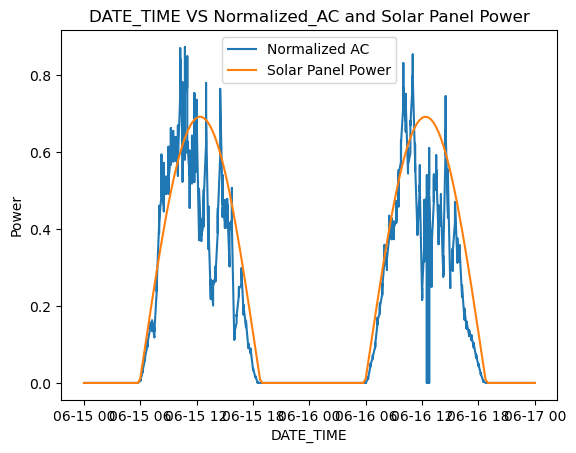

In [30]:
import matplotlib.pyplot as plt

# Filter the data for the desired date range
start_date = '2020-06-15'
end_date = '2020-06-17'
filtered_data = gen_1[(gen_1['DATE_TIME'] >= start_date) & (gen_1['DATE_TIME'] <= end_date)]

# Plotting the graph
plt.plot(filtered_data['DATE_TIME'], filtered_data['Normalized_AC'], label='Normalized AC')
plt.plot(filtered_data['DATE_TIME'], filtered_data['Solar Panel Power_07'], label='Solar Panel Power')

# Set plot title and labels
plt.title('DATE_TIME VS Normalized_AC and Solar Panel Power')
plt.xlabel('DATE_TIME')
plt.ylabel('Power')

# Set legends
plt.legend()

# Display the plot
plt.show()

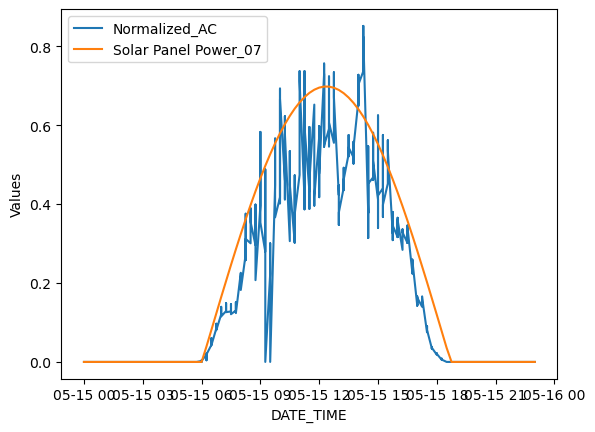

In [31]:
import pandas as pd
import matplotlib.pyplot as plt




gen_1['Difference'] = abs(gen_1['Normalized_AC'] - gen_1['Solar Panel Power_07'])



closest_index = gen_1['Difference'].idxmin()
closest_date = gen_1.loc[closest_index, 'DATE_TIME'].date()



closest_df = gen_1[gen_1['DATE_TIME'].dt.date == closest_date]



plt.plot(closest_df['DATE_TIME'], closest_df['Normalized_AC'], label='Normalized_AC')
plt.plot(closest_df['DATE_TIME'], closest_df['Solar Panel Power_07'], label='Solar Panel Power_07')
plt.xlabel('DATE_TIME')
plt.ylabel('Values')
plt.legend()
plt.show()

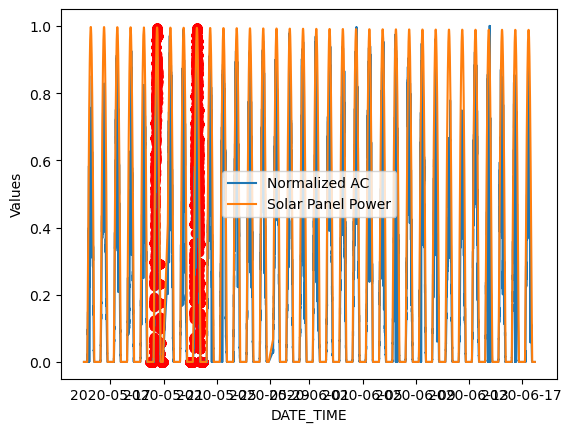

In [32]:
import matplotlib.pyplot as plt
import pandas as pd



plt.plot(gen_1['DATE_TIME'], gen_1['Normalized_AC'], label='Normalized AC')
plt.plot(gen_1['DATE_TIME'], gen_1['Solar Panel Power'], label='Solar Panel Power')

plt.legend()

closest_days = gen_1.groupby(gen_1['DATE_TIME'].dt.date).apply(lambda x: x['Normalized_AC'].corr(x['Solar Panel Power'])).nlargest(2).index
closest_data = gen_1[gen_1['DATE_TIME'].dt.date.isin(closest_days)]

plt.scatter(closest_data['DATE_TIME'], closest_data['Normalized_AC'], c='red', label='Closest Data')
plt.scatter(closest_data['DATE_TIME'], closest_data['Solar Panel Power'], c='red')

plt.xlabel('DATE_TIME')
plt.ylabel('Values')

plt.show()


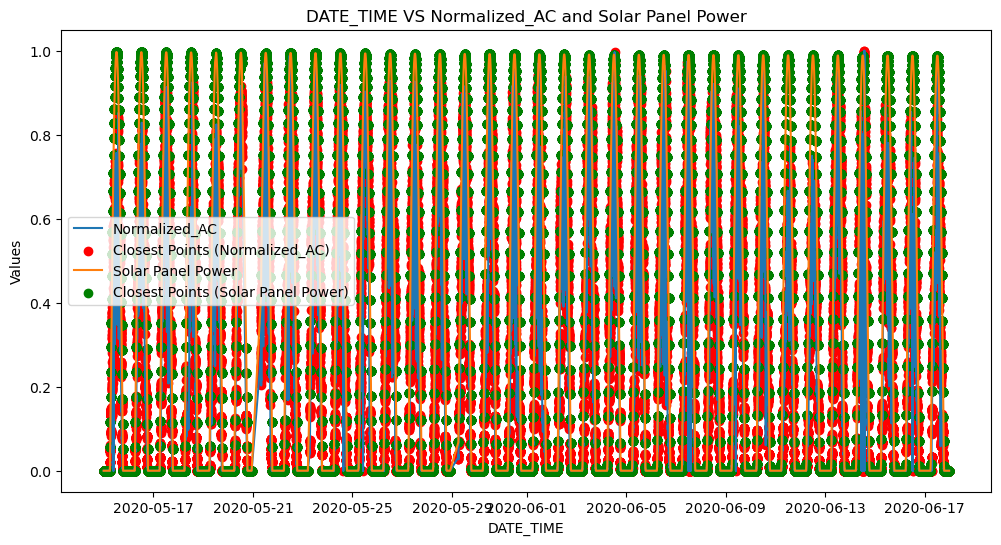

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'gen_1' is a DataFrame containing the necessary columns

# Convert DATE_TIME column to datetime type
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

# Calculate the time difference between consecutive rows
diff = gen_1['DATE_TIME'].diff().fillna(pd.Timedelta(seconds=0))

# Find the rows where DATE_TIME VS Normalized_AC and DATE_TIME VS Solar Panel Power are closest
closest_rows = gen_1[(diff == diff.min()) & (diff.shift(-1) == diff.shift(-1).min())]

# Plotting the graph
plt.figure(figsize=(12, 6))

# DATE_TIME VS Normalized_AC graph
plt.plot(gen_1['DATE_TIME'], gen_1['Normalized_AC'], label='Normalized_AC')
plt.scatter(closest_rows['DATE_TIME'], closest_rows['Normalized_AC'], color='red', label='Closest Points (Normalized_AC)')

# DATE_TIME VS Solar Panel Power graph
plt.plot(gen_1['DATE_TIME'], gen_1['Solar Panel Power'], label='Solar Panel Power')
plt.scatter(closest_rows['DATE_TIME'], closest_rows['Solar Panel Power'], color='green', label='Closest Points (Solar Panel Power)')

# Set legends
plt.legend()

# Set labels and title
plt.xlabel('DATE_TIME')
plt.ylabel('Values')
plt.title('DATE_TIME VS Normalized_AC and Solar Panel Power')

# Show the plot
plt.show()

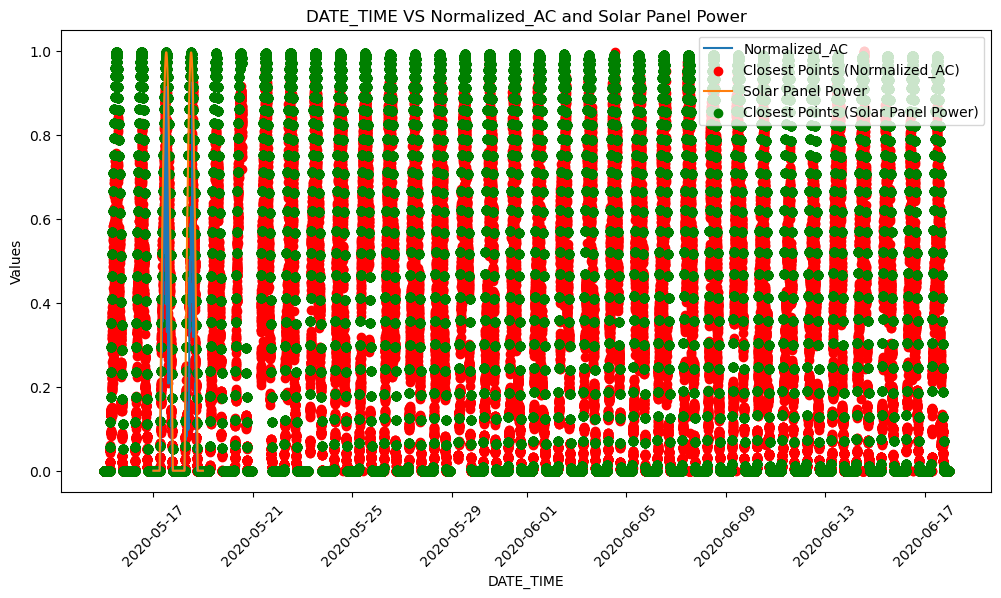

In [35]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the time difference between consecutive rows
diff = gen_1['DATE_TIME'].diff().fillna(pd.Timedelta(seconds=0))

# Find the rows where DATE_TIME VS Normalized_AC and DATE_TIME VS Solar Panel Power are closest
closest_rows = gen_1[(diff == diff.min()) & (diff.shift(-1) == diff.shift(-1).min())]

# Subset the gen_1 DataFrame to only include data for the desired 2-day period
subset_gen_1 = gen_1[(gen_1['DATE_TIME'] >= '2020-05-17') & (gen_1['DATE_TIME'] < '2020-05-19')]
#2020-05-15 00:00:00



# Plotting the graph
plt.figure(figsize=(12, 6))

# DATE_TIME VS Normalized_AC graph
plt.plot(subset_gen_1['DATE_TIME'], subset_gen_1['Normalized_AC'], label='Normalized_AC')
plt.scatter(closest_rows['DATE_TIME'], closest_rows['Normalized_AC'], color='red', label='Closest Points (Normalized_AC)')

# DATE_TIME VS Solar Panel Power graph
plt.plot(subset_gen_1['DATE_TIME'], subset_gen_1['Solar Panel Power'], label='Solar Panel Power')
plt.scatter(closest_rows['DATE_TIME'], closest_rows['Solar Panel Power'], color='green', label='Closest Points (Solar Panel Power)')

# Set legends
plt.legend()

# Set labels and title
plt.xlabel('DATE_TIME')
plt.ylabel('Values')
plt.title('DATE_TIME VS Normalized_AC and Solar Panel Power')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_14664\1178536443.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  closest_rows = subset_gen_1[(diff == diff.min()) & (diff.shift(-1) == diff.shift(-1).min())]


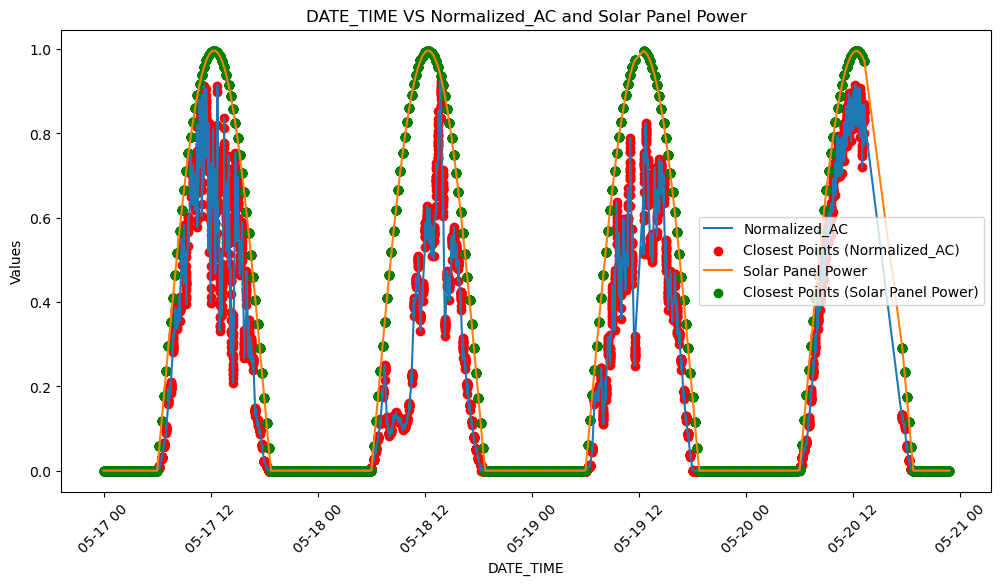

In [36]:
# Subset the gen_1 DataFrame to only include data for the desired 2-day period
subset_gen_1 = gen_1[(gen_1['DATE_TIME'] >= '2020-05-17') & (gen_1['DATE_TIME'] < '2020-05-21')]

# Find the rows where DATE_TIME VS Normalized_AC and DATE_TIME VS Solar Panel Power are closest
closest_rows = subset_gen_1[(diff == diff.min()) & (diff.shift(-1) == diff.shift(-1).min())]

# Plotting the graph
plt.figure(figsize=(12, 6))

# DATE_TIME VS Normalized_AC graph
plt.plot(subset_gen_1['DATE_TIME'], subset_gen_1['Normalized_AC'], label='Normalized_AC')
plt.scatter(closest_rows['DATE_TIME'], closest_rows['Normalized_AC'], color='red', label='Closest Points (Normalized_AC)')

# DATE_TIME VS Solar Panel Power graph
plt.plot(subset_gen_1['DATE_TIME'], subset_gen_1['Solar Panel Power'], label='Solar Panel Power')
plt.scatter(closest_rows['DATE_TIME'], closest_rows['Solar Panel Power'], color='green', label='Closest Points (Solar Panel Power)')

# Set legends
plt.legend()

# Set labels and title
plt.xlabel('DATE_TIME')
plt.ylabel('Values')
plt.title('DATE_TIME VS Normalized_AC and Solar Panel Power')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()